### Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

In [1]:
#Importing required libraries

#importing warnings
import warnings
warnings.filterwarnings("ignore")

# ************** DATA MANIPULATION *****************

#importing pandas and numpy
import pandas as pd
import numpy as np

# ************** DATA VISUALIZATION ****************

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression 

# ************* METRICS ****************************

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
#importing the dataset using read_csv
df = pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


By looking at the dataset and problem statement, I can say that Loan_Status is my target column.
Also, target column data looks categorical. So I can conclude that this project is a Classification problem.

## EDA

In [3]:
#Checking shape
df.shape

(614, 13)

Our dataset has 614 rows and 13 columns

In [4]:
#Checking missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

I can see null values present in these columns:
- Gender Married Dependents Self_Employed LoanAmount Loan_Amount_Term Credit_History 

In [5]:
#Checking all the column names and assigning it to variable col
col = df.columns
col

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

These are my feature/column names

### Dataset Description
   Input features:
       
- Loan_ID
- Gender
- Married
- Dependents
- Education
- Self_Employed
- ApplicantIncome
- CoapplicantIncome
- Loan_Amount
- Loan_Amount_Term
- Credit History
- Property_Area
       
----------------------------------------------------  
   Output feature:
- Loan_Status

Task: Predict whether the loan of the applicant will be approved or not

In [6]:
#Checking for indexes of empty observation/space in all columns
for i in df.columns:
    space = df.loc[df[i] == " "]
    print(space)

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Cred

I can see there are no empty observations in dataset

In [10]:
#Checking unique values
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

I see that all the features are useful as unique value is more than 2 and less than total rows.

In [11]:
#Checking data type of columns
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

- ApplicantIncome is integer column.
- 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status' are of object datatypes.
- 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History' are of object datatypes.

## EDA

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

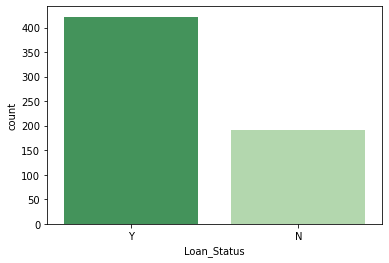

In [12]:
#Analysing our target variable 
sns.countplot(df["Loan_Status"],palette="Greens_r")

In the EDA Section, I wanted to start by analysing our target variable first. We have come across a very obvious observation!
- The number of people granted loan is double than the people with ungranted loan.
- Also, I see class imbalance which I will treat later.

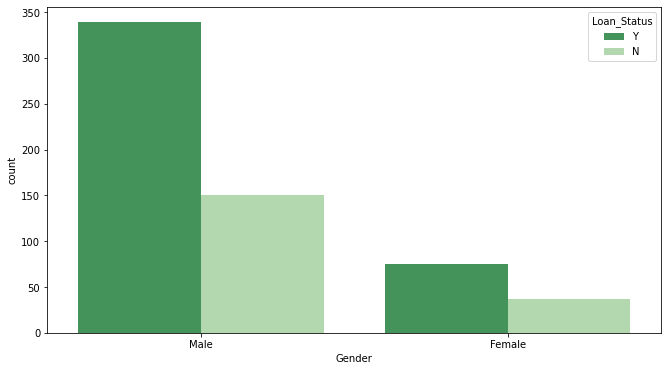

In [21]:
#Checking Loan status of Individuals of Different Gender
plt.figure(figsize=(11,6))
sns.countplot(df["Gender"],hue=df["Loan_Status"],palette="Greens_r")
plt.show()

We can see a significant gap in the earnings between males and females over here.

- For both gender, there are more than 50% of the adults with approved loan.
- Males tend to apply for loan more than females.

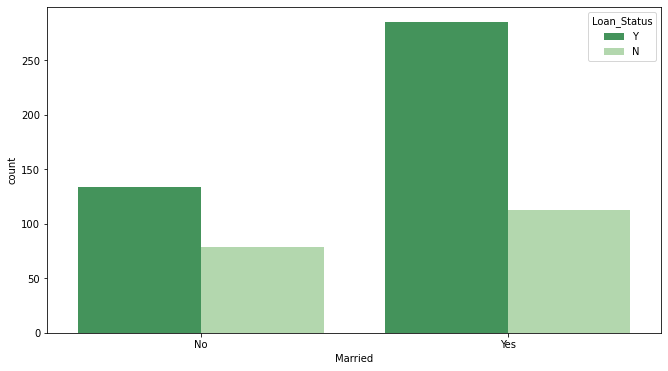

In [22]:
#Checking Loan status of Individuals of Different Marital status 
plt.figure(figsize=(11,6))
sns.countplot(df["Married"],hue=df["Loan_Status"],palette="Greens_r")
plt.show()

- The chance of getting a loan when married is slightly greater than unmarried.
- This shows married individuals apply for loan more than a single person.

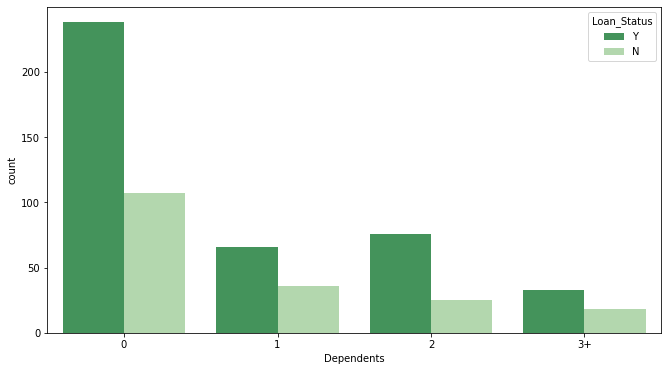

In [25]:
#Checking Loan status of Individuals of Different Dependents group
plt.figure(figsize=(11,6))
sns.countplot(df["Dependents"],hue=df["Loan_Status"],palette="Greens_r")
plt.show()

We have a very interesting observation here:
- An individual with no dependents tend to apply for loan rather than an individual with dependents.
- Chance of getting a loan is similar for all categories.

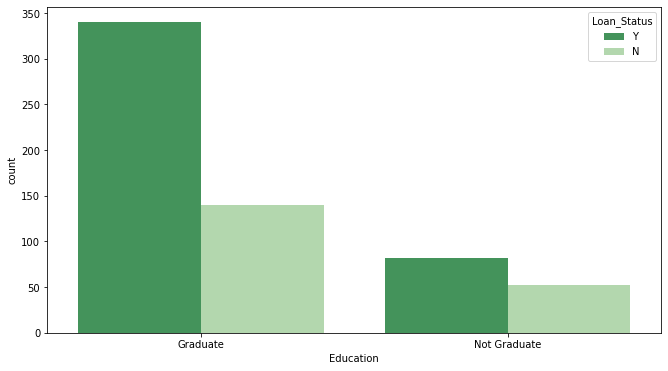

In [26]:
#Checking Loan status of Individuals of Different Education group
plt.figure(figsize=(11,6))
sns.countplot(df["Education"],hue=df["Loan_Status"],palette="Greens_r")
plt.show()

- Graduates are tend to apply for loan more than non-graduates.

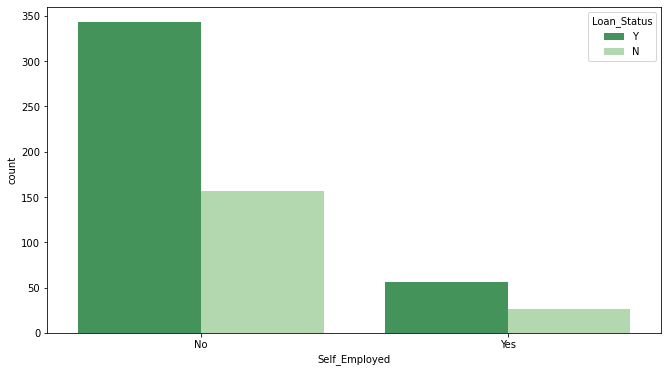

In [27]:
#Checking Loan status of Individuals of Different Employment status
plt.figure(figsize=(11,6))
sns.countplot(df["Self_Employed"],hue=df["Loan_Status"],palette="Greens_r")
plt.show()

- If a person is self employed, there's a greater chance that they'll apply for loan.
- However, the approval rate is same in both the categories.

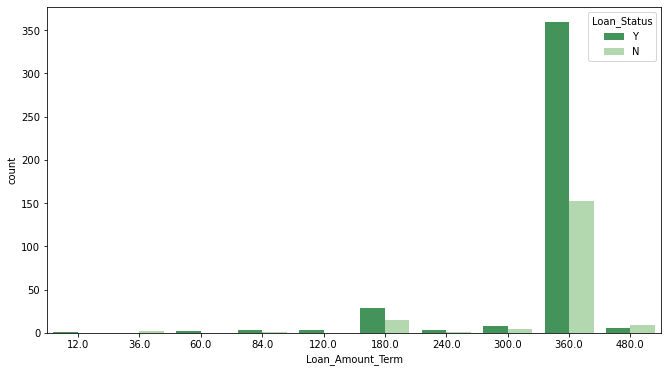

In [28]:
#Checking Loan status of Individuals of Different Loan amount term
plt.figure(figsize=(11,6))
sns.countplot(df["Loan_Amount_Term"],hue=df["Loan_Status"],palette="Greens_r")
plt.show()

- An important point to notice over here is that, except 360 days there are very few individuals with different term.
- Also, the chance of rejection of loan increases with increment of loan amount term.

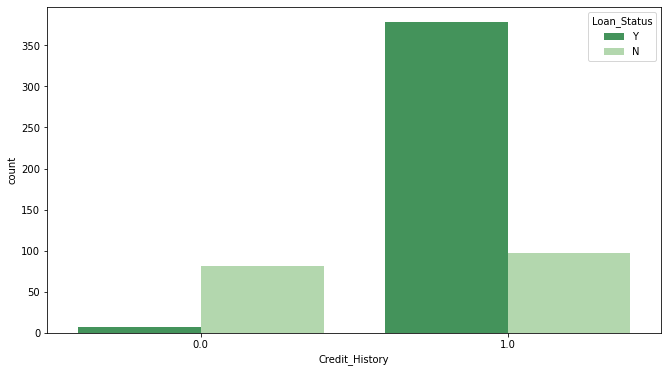

In [29]:
#Checking Loan status of Individuals of Different credit history
plt.figure(figsize=(11,6))
sns.countplot(df["Credit_History"],hue=df["Loan_Status"],palette="Greens_r")
plt.show()

We have an interesting observation:
- A person with credit history has greater chance of loan approvals.
- With no credit history, there's only 10-15% chance of getting a loan.

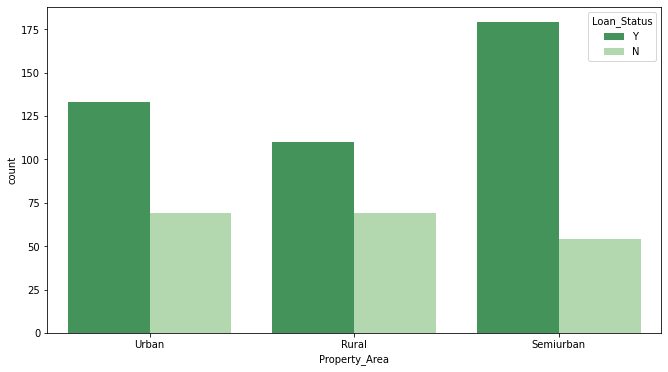

In [30]:
#Checking Loan status of Individuals of Different Areas
plt.figure(figsize=(11,6))
sns.countplot(df["Property_Area"],hue=df["Loan_Status"],palette="Greens_r")
plt.show()

The approval rate for Semiurban region is greater than that of other 2 categories.

In [32]:
#Encoding my target variable so that I can check the correlation with numerical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [34]:
df.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

The target values are encoded now. 

## Multi-variate Analysis

In [36]:
#describing the dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


Observation:
- The minimum and maximum of Applicant Income is 150 & 81000 respectively, while the average age is 5400.
- While the minimum Coapplicant Income is 0 and maximum is 41667.
- We can notice the loan amount varying between 9 to 700 and mean being 146.
- The term is from 12 days to 480 days in this dataset.

<AxesSubplot:>

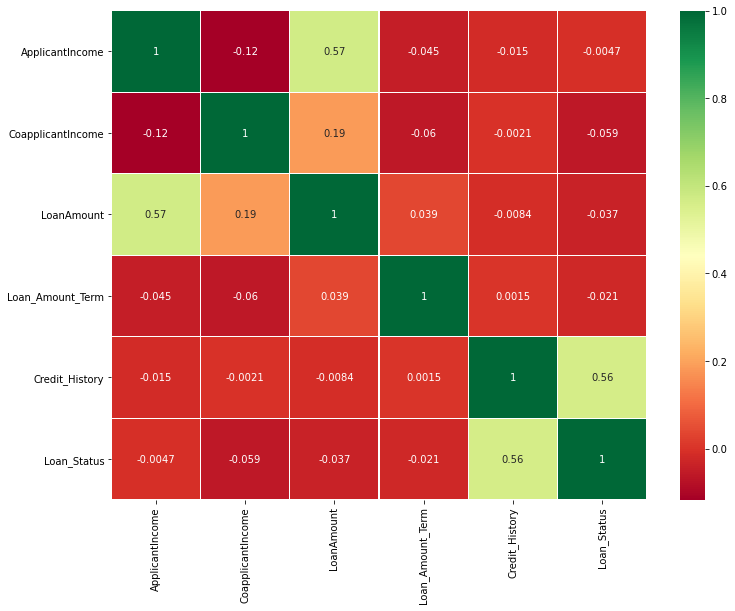

In [37]:
#Plotting heatmap with all features
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),linewidths=.1,annot=True, annot_kws={"size": 10}, cmap="RdYlGn")

Here, we have tried to plot a correlation map in order to see whether or not the independent features are related to the dependent features.

    We see that Credit history is positively correlated with the target variable. 
    Whereas, other continuous features shows no relation/slightly negative relation.
    An important thing to note over here is that, we have not covered the object datatypes in this correlation graph.

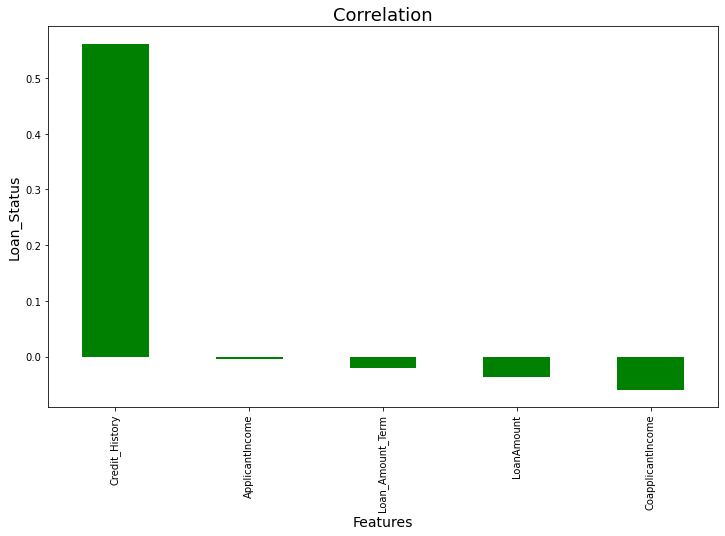

In [39]:
#Visualizing correlation of target variable using bar plot
plt.figure(figsize=(12,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Loan_Status',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

- I notice that most of the numerical features are unrelated with target.
- Credit history shows highest correlation than other features.

<Figure size 432x288 with 0 Axes>

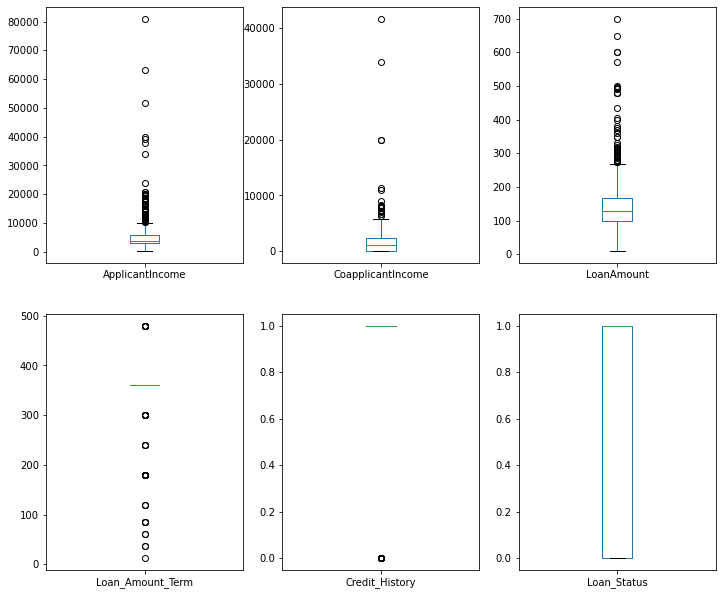

In [40]:
#Checking skewness with boxplot
plt.figure()
df.plot(kind="box",subplots=True,layout=(3,3),figsize=(12,16))
plt.show()

In [18]:
'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().